# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [6]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=6_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'


# Baseline

Lasketaan työllisyysasteet nykymallissa.

In [4]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=100,startn=98,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/baseline/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

computing 98
train...
phase 1


KeyboardInterrupt: 

In [ ]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=49,stats_results='results/baseline/distrib_stats')

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=100,startn=76,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=2,startn=0,stats_results='results/putki/distrib_poisto_stats')

In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
#cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_distrib('results/putki/distrib_base_v','results/putki/distrib_poisto_v')                    


# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 97
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 1852     |
| nupdates           | 1        |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0157  |
| total_timesteps    | 0        |
| value_loss         | 0.0137   |
-----------------------------

---------------------------------
| explained_variance | 0.985    |
| fps                | 2742     |
| nupdates           | 60       |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0443  |
| total_timesteps    | 143075   |
| value_loss         | 0.184    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2716     |
| nupdates           | 70       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0133  |
| total_timesteps    | 167325   |
| value_loss         | 0.0676   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2696     |
| nupdates           | 80       |
| policy_entropy     | 1        |
| policy_loss        | -0.0101  |
| total_timesteps    | 191575   |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 330      |
| policy_entropy     | 1        |
| policy_loss        | 0.00412  |
| total_timesteps    | 797825   |
| value_loss         | 0.00752  |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2738     |
| nupdates           | 340      |
| policy_entropy     | 1        |
| policy_loss        | -0.0223  |
| total_timesteps    | 822075   |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 350      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00663 |
| total_timesteps    | 846325   |
| value_loss         | 0.0278   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 600      |
| policy_entropy     | 1        |
| policy_loss        | 0.00128  |
| total_timesteps    | 1452575  |
| value_loss         | 0.00774  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 610      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00353 |
| total_timesteps    | 1476825  |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2762     |
| nupdates           | 620      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0213  |
| total_timesteps    | 1501075  |
| value_loss         | 0.0224   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2769     |
| nupdates           | 870      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0186  |
| total_timesteps    | 2107325  |
| value_loss         | 0.0291   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 880      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0206  |
| total_timesteps    | 2131575  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 890      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0218  |
| total_timesteps    | 2155825  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2776     |
| nupdates           | 1140     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0389  |
| total_timesteps    | 2762075  |
| value_loss         | 0.0245   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2776     |
| nupdates           | 1150     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0183  |
| total_timesteps    | 2786325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0114  |
| total_timesteps    | 2810575  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2781     |
| nupdates           | 1410     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0296  |
| total_timesteps    | 3416825  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2782     |
| nupdates           | 1420     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00719 |
| total_timesteps    | 3441075  |
| value_loss         | 0.00836  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2782     |
| nupdates           | 1430     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0153  |
| total_timesteps    | 3465325  |
| value_loss         | 0.00842  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2784     |
| nupdates           | 1680     |
| policy_entropy     | 1        |
| policy_loss        | -0.0152  |
| total_timesteps    | 4071575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2784     |
| nupdates           | 1690     |
| policy_entropy     | 1        |
| policy_loss        | -0.0128  |
| total_timesteps    | 4095825  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2784     |
| nupdates           | 1700     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00915 |
| total_timesteps    | 4120075  |
| value_loss         | 0.00724  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2788     |
| nupdates           | 1950     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00697 |
| total_timesteps    | 4726325  |
| value_loss         | 0.00522  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2788     |
| nupdates           | 1960     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 4750575  |
| value_loss         | 0.00759  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2788     |
| nupdates           | 1970     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0105  |
| total_timesteps    | 4774825  |
| value_loss         | 0.00471  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2789     |
| nupdates           | 2220     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0234  |
| total_timesteps    | 5381075  |
| value_loss         | 0.00611  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2789     |
| nupdates           | 2230     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0101  |
| total_timesteps    | 5405325  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2790     |
| nupdates           | 2240     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0179  |
| total_timesteps    | 5429575  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 98
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1971     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 0        |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 3368     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.523    |
| total_timesteps    | 21825    |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 3022     |
| nupdates           | 20       |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0408  |
| total_timesteps    | 46075    |
| value_loss         | 0.248    |
-------------------------------

----------------------------------
| explained_variance | 0.999     |
| fps                | 2759      |
| nupdates           | 270       |
| policy_entropy     | 1.01      |
| policy_loss        | -0.000976 |
| total_timesteps    | 652325    |
| value_loss         | 0.0121    |
----------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2759     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | -0.0256  |
| total_timesteps    | 676575   |
| value_loss         | 0.0462   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2759     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | 0.000552 |
| total_timesteps    | 700825   |
| value_loss         | 0.0477   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.0198  |
| total_timesteps    | 1307075  |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0229  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00973  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2757     |
| nupdates           | 560      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0187  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00942 |
| total_timesteps    | 1961825  |
| value_loss         | 0.00666  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2753     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0335  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00693 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2754     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.000245 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0239   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2754      |
| nupdates           | 1090      |
| policy_entropy     | 0.979     |
| policy_loss        | -0.000887 |
| total_timesteps    | 2640825   |
| value_loss         | 0.00788   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2754     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.00345 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 1        |
| fps                | 2755     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00475 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0048   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 1360     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0181  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00928  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2755     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0135  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1620     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0159  |
| total_timesteps    | 3926075  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1630     |
| policy_entropy     | 0.967    |
| policy_loss        | 0.00433  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00684  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2758     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0234  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0162  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0135  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2759     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00612 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00672  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0267  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00919  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 2170     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0212  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00765  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2760     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00819  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2430     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0292  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00153 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2762     |
| nupdates           | 2450     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0292  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 99
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1980     |
| nupdates           | 1        |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0174  |
| total_timesteps    | 0        |
| value_loss         | 0.00922  |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 3390     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0862   |
| total_timesteps    | 21825    |
| value_loss         | 0.628    |
---------------------------------
---------------------------------
| explained_variance | 0.773    |
| fps                | 3027     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.851   |
| total_timesteps    | 46075    |
| value_loss         | 3.64     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00422 |
| total_timesteps    | 652325   |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2764     |
| nupdates           | 280      |
| policy_entropy     | 0.943    |
| policy_loss        | -0.0197  |
| total_timesteps    | 676575   |
| value_loss         | 0.0943   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2764     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0332  |
| total_timesteps    | 700825   |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 540      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00383 |
| total_timesteps    | 1307075  |
| value_loss         | 0.00681  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2761     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00561 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0173   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2761     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0143  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0537   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2765     |
| nupdates           | 810      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0143  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0076   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 820      |
| policy_entropy     | 0.95     |
| policy_loss        | -0.00337 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2766     |
| nupdates           | 830      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00935 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00125 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00939  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00508 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2769     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.0115  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1350     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0255  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2772     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00463 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2772     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.027   |
| total_timesteps    | 3319825  |
| value_loss         | 0.0259   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00953 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00725  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00455 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2775     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0137  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00226 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1900     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00815 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00993  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2777     |
| nupdates           | 1910     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.00285 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00721  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2160     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.00272 |
| total_timesteps    | 5235575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 2170     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.00988 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2778     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0198  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00808  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.000687 |
| total_timesteps    | 5890325  |
| value_loss         | 0.0081   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 2440     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00992  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2779     |
| nupdates           | 2450     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0169  |
| total_timesteps    | 5938825  |
| value_loss         | 0.006    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

best_emp 90
lisäpäivillä on 3246 henkilöä
Työllisyyden keskiarvo keskiarvo 2121079 htv, mediaani 2121330 htv std 7424 htv
keskiarvo 2295466 työllistä, mediaani 2294322 työllistä, std 7422 työllistä


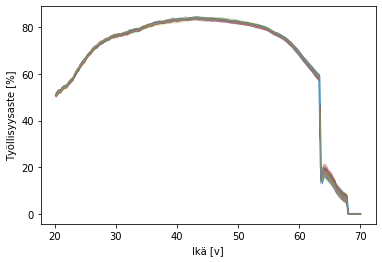

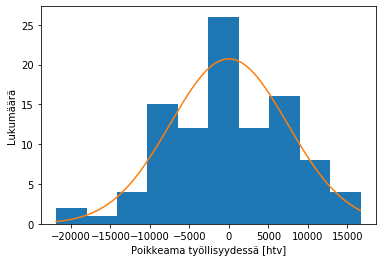

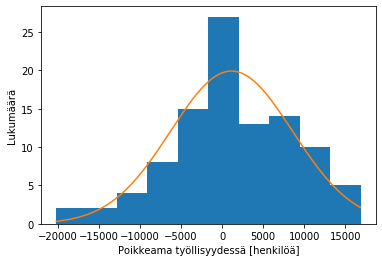

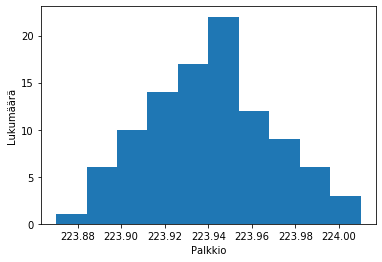

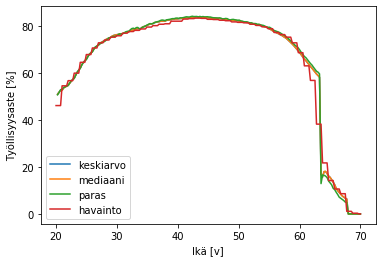

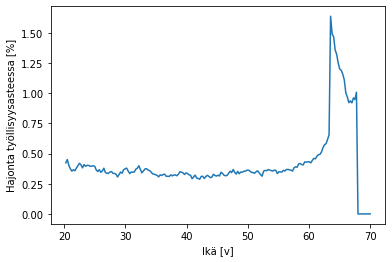

In [7]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=True)
porrasmalli='best/porrastus/malli_porrastus'
cc2_porras.run_distrib(n=100,startn=97,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus/distrib_porras_stats')

# Porrastus ilman vaikutusta putkeen

In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=False)
porrasmalli='best/porrastus_eiputki/malli_porrastus'
cc2_porras.run_distrib(n=50,startn=6,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,verbose=False,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus_eiputki/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

# TOE 12 kk

In [ ]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,perustulo=False,randomness=randomness)
toemalli='best/toe12/malli_toe'
cc2_toe.run_distrib(n=50,startn=18,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=toemalli,plot=True,cont=True,start_from=perusmalli,results='results/toe12/distrib_toe12',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_toe.render_distrib(load='results/toe12/distrib_toe12_v',n=18,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc2_toe.compare_distrib('results/distrib_stats','results/toe12/distrib_toe12_stats')

# Porrasta vain 1. askel

In [ ]:
cc3_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,
                     perustulo=False,randomness=randomness,porrasta_putki=False,
                     porrasta_1askel=True,porrasta_2askel=False,porrasta_3askel=False)
porrasmalli='best/porrastus_1askel/malli_porrastus'
cc3_porras.run_distrib(n=50,startn=0,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,verbose=False,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus_1askel/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

# Lyhempi työttömyysturva

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,randomness=randomness)
lyhytmalli='best/350/malli_350'
cc2_350.run_distrib(n=50,startn=0,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=lyhytmalli,plot=True,cont=True,start_from=perusmalli,results='results/350/distrib_350',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_350.render_distrib(load='results/350/distrib_350_v',n=1,startn=0,stats_results='results/350/distrib_350_stats')
cc2_350.compare_distrib('results/distrib_stats','results/350/distrib_350_stats')